In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print("Number of images in train set : {}".format(len(X_train)))
print("Number of images in test set : {}".format(len(X_test)))

Number of images in train set : 60000
Number of images in test set : 10000


Shape of image:(28, 28)


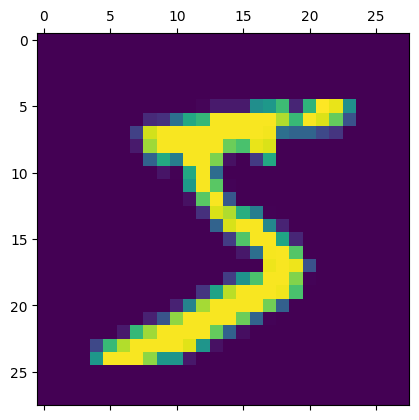

In [4]:
plt.matshow(X_train[0])
print("Shape of image:{}".format(X_train[0].shape))

In [5]:
X_train_flattened = (X_train.reshape(len(X_train), 28*28))/255
X_test_flattened = (X_test.reshape(len(X_test), 28*28))/255

In [6]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(28*28,), activation='relu'),
    keras.layers.Dense(70,activation='relu'),
    keras.layers.Dense(50,activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=15, batch_size = 32, validation_split = 0.2)

Epoch 1/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3635 - accuracy: 0.9051 - val_loss: 0.1641 - val_accuracy: 0.9562
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1347 - accuracy: 0.9596 - val_loss: 0.1149 - val_accuracy: 0.9664
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0927 - accuracy: 0.9728 - val_loss: 0.1049 - val_accuracy: 0.9703
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0689 - accuracy: 0.9792 - val_loss: 0.0936 - val_accuracy: 0.9733
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0537 - accuracy: 0.9840 - val_loss: 0.1072 - val_accuracy: 0.9706
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0967 - val_accuracy: 0.9728
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.1050 - val_accuracy:

In [7]:
loss, acc = model.evaluate(X_test_flattened, Y_test)
print("Test loss : {}".format(loss))
print("Test Accuracy : {}%".format(acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1001 - accuracy: 0.9762
Test loss : 0.10008106380701065
Test Accuracy : 97.61999845504761%


## *Explanation* 

## **Neural Network Architecture:**

# Input Layer:

Dense(100, input_shape=(28*28,), activation='relu'): The first layer consists of 100 neurons with a ReLU activation function. The input shape is set to (28*28,), indicating the flattened size of an MNIST image (28x28 pixels).
Explanation: ReLU (Rectified Linear Unit) is chosen for the input layer to introduce non-linearity and capture complex patterns in the data.

# Hidden Layers:

Dense(70, activation='relu'): The second hidden layer has 70 neurons with ReLU activation.
Dense(50, activation='sigmoid'): The third hidden layer contains 50 neurons with a sigmoid activation function.
Explanation: ReLU is commonly used in hidden layers for its ability to handle non-linear relationships, while sigmoid is used to introduce non-linearity with values between 0 and 1.

# Output Layer:

Dense(10, activation='softmax'): The final layer has 10 neurons corresponding to the 10 classes in the MNIST dataset. The softmax activation function is applied to convert raw outputs into probability scores.
Explanation: Softmax is suitable for multi-class classification, providing normalized probabilities for each class.

# *Model parameters:
* Optimizer: adam - Adam optimizer is chosen for its efficiency in training neural networks by adapting the learning rates for each parameter individually.

* Loss Function: sparse_categorical_crossentropy - Appropriate for multi-class classification problems with integer labels (as opposed to one-hot encoded labels).

* Metrics: accuracy - The model's performance is evaluated using accuracy as the metric.

# *Model Training:

* Training Data: The model is trained on the flattened training images (X_train_flattened) and corresponding labels (Y_train).

* Epochs: epochs=15 - Training is performed for 15 epochs, indicating the number of times the entire training dataset is passed through the neural network.

* Batch Size: batch_size=32 - Mini-batch gradient descent is used with a batch size of 32, balancing computational efficiency and convergence speed.

* Validation Split: validation_split=0.2 - 20% of the training data is used for validation during training to monitor model performance on unseen data.

The architecture is designed for image classification, and the chosen parameters aim to optimize the model for accurate predictions on the MNIST dataset.


